In [1]:
import keras

Using TensorFlow backend.


In [13]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os

## Creating the data

In [112]:
dataset = pd.read_csv('aapl_msi_sbux.csv')
dataset.head()

,AAPL,MSI,SBUX
0,67.8542,60.30,28.185
1,68.5614,60.90,28.070
2,66.8428,60.83,28.130
3,66.7156,60.81,27.915
4,66.6556,61.12,27.775


In [113]:
#Getting the data fragments
apple = dataset.iloc[:,0].values
msi = dataset.iloc[:,1].values
starbucks = dataset.iloc[:,2].values

In [114]:
#Making the training and testing data
a_scaler = StandardScaler()
apple = a_scaler.fit_transform(apple.reshape(-1,1))
apple_x = apple[:-1,]
apple_y = apple[1:]

m_scaler = StandardScaler()
msi = m_scaler.fit_transform(msi.reshape(-1,1))
msi_x = msi[:-1,]
msi_y = msi[1:]

s_scaler = StandardScaler()
starbucks = s_scaler.fit_transform(starbucks.reshape(-1,1))
starbucks_x = starbucks[:-1,]
starbucks_y = starbucks[1:]

## Creating the forecasting model

### 1> For apple

In [122]:
apple_y = apple_y.reshape(apple_y.shape[0])
apple_x = apple_x.reshape(apple_x.shape[0],1,apple_x.shape[1])

In [123]:
#Creating the network structure
model_apple = Sequential()
model_apple.add(LSTM(1024,input_shape=(1,1)))
model_apple.add(keras.layers.Dense(1,activation = 'sigmoid'))
#Building the model
model_apple.compile(optimizer='adam',loss = 'mae')

In [124]:
x_train = apple_x[:1000,:,:]
y_train = apple_y[:1000]
x_test = apple_x[1000:,:,:]
y_test = apple_y[1000:]

In [125]:
len(y_test)

258

In [126]:
model_apple.fit(x_train, y_train, batch_size=10, epochs=5)

Epoch 1/5
1000/1000 [==============================] - 11s 11ms/step - loss: 0.6877
Epoch 2/5
1000/1000 [==============================] - 7s 7ms/step - loss: 0.5339
Epoch 3/5
1000/1000 [==============================] - 7s 7ms/step - loss: 0.5253
Epoch 4/5
1000/1000 [==============================] - 7s 7ms/step - loss: 0.5250
Epoch 5/5
1000/1000 [==============================] - 7s 7ms/step - loss: 0.5244


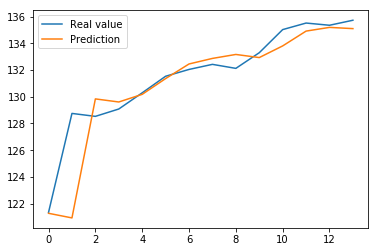

In [136]:
plt.plot(a_scaler.inverse_transform(y_test[:14]), label = 'Real value')
plt.plot(a_scaler.inverse_transform(model_apple.predict(x_test[:14])),label = 'Prediction')
plt.legend()
plt.show()

In [135]:
##Saving the model
if not os.path.exists("Apple"):
    os.mkdir("Apple")
with open('Apple/apple_model.json','w') as f:
    f.write(model_apple.to_json())

model_apple.save_weights('Apple/apple_w.h5')

### 2> MSI stocks

In [15]:
msi_y = msi_y.reshape(msi_y.shape[0])
msi_x = msi_x.reshape(msi_x.shape[0],1,msi_x.shape[1])

In [16]:
#Creating the network structure
model_msi = Sequential()
model_msi.add(LSTM(1024,input_shape=(1,1)))
model_msi.add(keras.layers.Dense(1,activation = 'sigmoid'))
#Building the model
model_msi.compile(optimizer='adam',loss = 'mae')

In [18]:
x_train = msi_x[:1000,:,:]
y_train = msi_y[:1000]
x_test = msi_x[1000:,:,:]
y_test = msi_y[1000:]

In [20]:
model_msi.fit(x_train, y_train, batch_size=10, epochs=5)

Epoch 1/5
1000/1000 [==============================] - 7s 7ms/step - loss: 0.5445
Epoch 2/5
1000/1000 [==============================] - 7s 7ms/step - loss: 0.5445
Epoch 3/5
1000/1000 [==============================] - 7s 7ms/step - loss: 0.5443
Epoch 4/5
1000/1000 [==============================] - 7s 7ms/step - loss: 0.5442
Epoch 5/5
1000/1000 [==============================] - 7s 7ms/step - loss: 0.5443


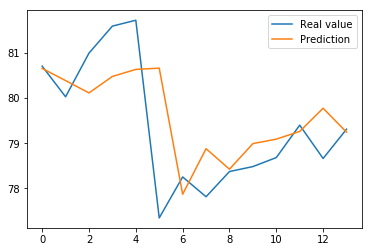

In [21]:
plt.plot(m_scaler.inverse_transform(y_test[:14]), label = 'Real value')
plt.plot(m_scaler.inverse_transform(model_msi.predict(x_test[:14])),label = 'Prediction')
plt.legend()
plt.show()

In [32]:
##Saving the model
if not os.path.exists("MSI"):
    os.mkdir("MSI")
with open('MSI/msi_model.json','w') as f:
    f.write(model_msi.to_json())

model_msi.save_weights('MSI/msi_w.h5')

### 3> Starbucks Stocks

In [23]:
starbucks_y = starbucks_y.reshape(starbucks_y.shape[0])
starbucks_x = starbucks_x.reshape(starbucks_x.shape[0],1,starbucks_x.shape[1])

In [24]:
#Creating the network structure
model_sbux = Sequential()
model_sbux.add(LSTM(1024,input_shape=(1,1)))
model_sbux.add(keras.layers.Dense(1,activation = 'sigmoid'))
#Building the model
model_sbux.compile(optimizer='adam',loss = 'mae')

In [61]:
x_train = starbucks_x[:1000,:,:]
y_train = starbucks_y[:1000]
x_test = starbucks_x[1000:,:,:]
y_test = starbucks_y[1000:]

In [26]:
model_sbux.fit(x_train, y_train, batch_size=10, epochs=5)

Epoch 1/5
1000/1000 [==============================] - 10s 10ms/step - loss: 0.8096
Epoch 2/5
1000/1000 [==============================] - 7s 7ms/step - loss: 0.6339
Epoch 3/5
1000/1000 [==============================] - 7s 7ms/step - loss: 0.6230
Epoch 4/5
1000/1000 [==============================] - 7s 7ms/step - loss: 0.6225
Epoch 5/5
1000/1000 [==============================] - 7s 7ms/step - loss: 0.6220


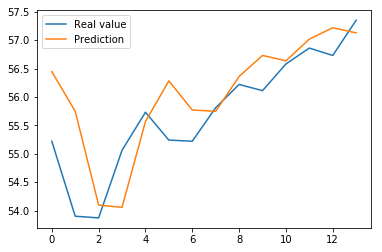

In [64]:
plt.plot(s_scaler.inverse_transform(y_test[:14]), label = 'Real value')
plt.plot(s_scaler.inverse_transform(model_sbux.predict(x_test[:14])),label = 'Prediction')
plt.legend()
plt.show()

In [31]:
##Saving the model
if not os.path.exists("Starbucks"):
    os.mkdir("Starbucks")
with open('Starbucks/sbux_model.json','w') as f:
    f.write(model_sbux.to_json())

model_sbux.save_weights('Starbucks/sbux_w.h5')

## Forecast

In [97]:
x_test = apple_x[1000:,:,:]
y_test = apple_y[1000:]

In [84]:
seed = 10
input_data = x_test[:10]
forecast= []
for i in range(14):
    prediction = model_apple.predict(input_data)
    forecast.append(prediction[-1][0])
    input_data = np.append(input_data,prediction[-1].reshape((1, 1, 1)),axis=0)[1:,:,:]